In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/trab1/cursos-prouni.csv - cursos-prouni-2018-tratados.csv.csv')

In [5]:
list_drop_columns = ['grau',
                     'turno',
                     'nome',
                     'curso_id',
                     'nota_parcial_ampla',
                     'nota_parcial_cotas',
                     'nota_integral_ampla',
                     'nota_integral_cotas',
                     'mensalidade',
                     'cidade_busca',
                     'uf_busca',
                    'universidade_nome',
                     ]

df_aux = df.drop(columns=list_drop_columns)

In [6]:
df_aux.head()

,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_busca
0,2.0,5.0,6.0,10.0,Medicina
1,4.0,1.0,5.0,2.0,Medicina
2,4.0,4.0,5.0,5.0,Medicina
3,2.0,1.0,7.0,2.0,Medicina
4,3.0,1.0,6.0,2.0,Medicina


ATRIBUTOS:

curso_busca: qual curso está sendo ofertado

bolsa_integral_ampla: quantidade de bolsas da categoria de bolsa integral de ampla concorrência

bolsa_integral_cotas: quantidade de bolsas da categoria de bolsa integral com aplicação de cotas

bolsa_parcial_ampla: quantidade de bolsas da categoria de bolsa parcial de ampla concorrência

bolsa_parcial_cotas: quantidade de bolsas da categoria de bolsa parcial com aplicação de cotas

In [7]:
#Exploração e tratamento dos dados
df_aux.head(2)

,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_busca
0,2.0,5.0,6.0,10.0,Medicina
1,4.0,1.0,5.0,2.0,Medicina


In [8]:
df_aux.rename(columns={'curso_busca': 'curso_ofertado'}, inplace=True)

In [9]:
df_aux.head(3)

,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_ofertado
0,2.0,5.0,6.0,10.0,Medicina
1,4.0,1.0,5.0,2.0,Medicina
2,4.0,4.0,5.0,5.0,Medicina


In [10]:
# valores NaN
df_aux.isnull().sum()

bolsa_integral_cotas    0
bolsa_integral_ampla    0
bolsa_parcial_cotas     0
bolsa_parcial_ampla     0
curso_ofertado          0
dtype: int64

In [11]:
# tipos de atributos
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
df_aux.dtypes

bolsa_integral_cotas    float64
bolsa_integral_ampla    float64
bolsa_parcial_cotas     float64
bolsa_parcial_ampla     float64
curso_ofertado           object
dtype: object

In [12]:
# Dados estatísticos

df_aux.describe()

,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla
count,2203.000000,2203.000000,2203.000000,2203.000000
mean,1.891058,2.082161,3.387199,7.190649
std,1.969321,2.105756,4.020312,13.897084
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000
50%,1.000000,1.000000,2.000000,3.000000
75%,2.000000,2.000000,4.000000,6.000000
max,34.000000,50.000000,74.000000,179.000000


Outliers

In [14]:
import plotly.express as px

In [15]:
boxplot = px.box(df_aux, y="bolsa_integral_ampla")
boxplot.show()

In [16]:
boxplot = px.box(df_aux, y="bolsa_integral_cotas")
boxplot.show()

In [17]:
boxplot = px.box(df_aux, y="bolsa_parcial_ampla")
boxplot.show()

In [18]:
boxplot = px.box(df_aux, y="bolsa_parcial_cotas")
boxplot.show()

Pré-processamento

In [19]:
df_aux.head(2)

,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_ofertado
0,2.0,5.0,6.0,10.0,Medicina
1,4.0,1.0,5.0,2.0,Medicina


In [20]:
#excluir cursos ofertados
df2 = df_aux.drop(labels = 'curso_ofertado', axis = 1)

In [21]:
df2.head(2)

,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla
0,2.0,5.0,6.0,10.0
1,4.0,1.0,5.0,2.0


In [22]:
#escalonamento
from sklearn.preprocessing import StandardScaler

In [23]:
escala = StandardScaler()
df2_esc = escala.fit_transform(df2)

In [24]:
df2_esc

array([[ 0.05533231,  1.38596374,  0.65004759,  0.20219988],
       [ 1.07114123, -0.51402264,  0.40125419, -0.37359115],
       [ 1.07114123,  0.91096714,  0.40125419, -0.15766952],
       ...,
       [-0.45257216, -0.51402264, -0.59391944, -0.30161727],
       [-0.45257216, -0.03902605, -0.59391944,  0.130226  ],
       [-0.45257216, -0.03902605, -0.34512603, -0.15766952]])

K Means com PCA

In [25]:
df2_esc

array([[ 0.05533231,  1.38596374,  0.65004759,  0.20219988],
       [ 1.07114123, -0.51402264,  0.40125419, -0.37359115],
       [ 1.07114123,  0.91096714,  0.40125419, -0.15766952],
       ...,
       [-0.45257216, -0.51402264, -0.59391944, -0.30161727],
       [-0.45257216, -0.03902605, -0.59391944,  0.130226  ],
       [-0.45257216, -0.03902605, -0.34512603, -0.15766952]])

In [26]:
df2_esc.shape

(2203, 4)

In [27]:
#componentes principais
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components = 2)

In [29]:
df2_pca = pca.fit_transform(df2_esc)

In [30]:
df2_pca

array([[ 1.12564228,  0.16794994],
       [ 0.56551109, -0.70033575],
       [ 1.28738674, -0.37095866],
       ...,
       [-0.94024175, -0.11823742],
       [-0.62207094,  0.33467954],
       [-0.53417055,  0.00898921]])

In [31]:
# razão das variáveis explicativas
pca.explained_variance_ratio_

array([0.58339697, 0.23773459])

In [32]:
# Soma das variáveis explicativas
pca.explained_variance_ratio_.sum()

0.8211315593828937

In [33]:
#elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df2_pca)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

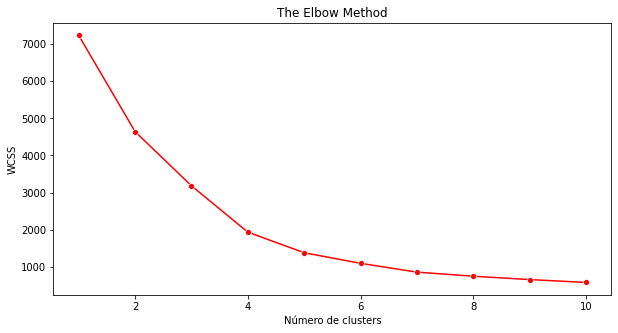

In [35]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

Agrupamento

In [36]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)

In [37]:
kmeans_fit = kmeans.fit(df2_pca)

In [38]:
#coordenadas dos centróides
centroides = kmeans_fit.cluster_centers_
centroides

array([[-0.39578895, -0.13845063],
       [ 2.60964888, -0.42618875],
       [15.80820662, -2.24242744],
       [ 0.61571511,  3.77394239]])

In [39]:
#classificação dos dados
classificacao = kmeans_fit.labels_
classificacao

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

In [40]:
classificacao[2]

1

In [41]:
import plotly.express as px
import plotly.graph_objects as go

In [42]:
graf1 = px.scatter(x = df2_pca[:,0], y = df2_pca[:,1], color=classificacao)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means com PCA')
graf3.update_xaxes(title = 'Componente 1')
graf3.update_yaxes(title = 'Componente 2')
graf3.show()

In [43]:
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])
agrupamento

,Grupo
0,0
1,0
2,1
3,0
4,0
...,...
2198,0
2199,0
2200,0
2201,0


In [44]:
df_aux = pd.concat([df_aux, agrupamento],axis=1)
df_aux

,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_ofertado,Grupo
0,2.0,5.0,6.0,10.0,Medicina,0
1,4.0,1.0,5.0,2.0,Medicina,0
2,4.0,4.0,5.0,5.0,Medicina,1
3,2.0,1.0,7.0,2.0,Medicina,0
4,3.0,1.0,6.0,2.0,Medicina,0
...,...,...,...,...,...,...
2198,1.0,2.0,1.0,3.0,Teologia,0
2199,1.0,1.0,1.0,3.0,Teologia,0
2200,1.0,1.0,1.0,3.0,Pedagogia,0
2201,1.0,2.0,1.0,9.0,Gestão da Qualidade,0


In [45]:
df_aux.iloc[125 , :]

bolsa_integral_cotas                        1.0
bolsa_integral_ampla                        4.0
bolsa_parcial_cotas                         1.0
bolsa_parcial_ampla                         3.0
curso_ofertado          Arquitetura e Urbanismo
Grupo                                         0
Name: 125, dtype: object

In [46]:
grupo0 = df_aux.loc[df_aux.Grupo == 0]
grupo0 

,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_ofertado,Grupo
0,2.0,5.0,6.0,10.0,Medicina,0
1,4.0,1.0,5.0,2.0,Medicina,0
3,2.0,1.0,7.0,2.0,Medicina,0
4,3.0,1.0,6.0,2.0,Medicina,0
5,4.0,1.0,8.0,2.0,Medicina,0
...,...,...,...,...,...,...
2198,1.0,2.0,1.0,3.0,Teologia,0
2199,1.0,1.0,1.0,3.0,Teologia,0
2200,1.0,1.0,1.0,3.0,Pedagogia,0
2201,1.0,2.0,1.0,9.0,Gestão da Qualidade,0


In [47]:
grupo0.shape

(1883, 6)